<a href="https://colab.research.google.com/github/defesagit/ProyectoBanco/blob/main/ProyectoBancoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1) Descripcón del Problema**

Las amenazas financieras están mostrando una tendencia sobre el riesgo crediticio de los bancos comerciales a medida que ha surgido la increíble mejora en la industria financiera. De esta forma, una de las mayores amenazas a las que se enfrentan los bancos comerciales es la predicción del riesgo de los clientes de crédito.

Los estudios recientes se centran principalmente en mejorar el rendimiento del clasificador para la predicción de incumplimiento de tarjetas

# **2)Depuración de Datos**



## **2.1 Librerias**

In [2]:
import numpy as np # para calculo matricial y matematicas
import pandas as pd #para depurar datos
import seaborn as sns
#!


## **2.2 Importar Datos**

In [3]:
url="https://raw.githubusercontent.com/defesagit/ProyectoBanco/main/UCI_Credit_Card%20(1).csv"

In [4]:
df=pd.read_csv(url)

In [5]:
#Encabezado
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## **2.3 Dimensiòn**

In [6]:
print(df.shape)

(30000, 25)


## **2.4 Diccionario de Variables**

ID : ID de cada cliente
Monto_Credito : cantidad del crédito otorgado en dólares NT (incluye crédito individual y familiar / suplementario
SEXO : Género (1 = masculino, 2 = femenino)
EDUCACIÓN : (1 = posgrado, 2 = universidad, 3 = bachillerato, 4 = otros, 5 = desconocido, 6 = desconocido)
MATRIMONIO : Estado civil (1 = casado, 2 = soltero, 3 = otros)
EDAD : Edad en años
PAY_0 : Estado de reembolso en septiembre de 2005 (-1 = pago debidamente, 1 = retraso en el pago durante un mes, 2 = retraso en el pago durante dos meses,… 8 = retraso en el pago durante ocho meses, 9 = retraso en el pago durante nueve meses o más)
PAY_2 : Estado de reembolso en agosto de 2005 (escala igual a la anterior)
PAY_3 : Estado de reembolso en julio de 2005 (escala igual a la anterior)
PAY_4 : Estado de reembolso en junio de 2005 (escala igual a la anterior)
PAY_5 : Estado de reembolso en mayo de 2005 (escala igual a la anterior)
PAY_6 : Estado de reembolso en abril de 2005 (escala igual a la anterior)
BILL_AMT1 : Monto del extracto de la factura en septiembre de 2005 (dólar NT)
BILL_AMT2 : Monto del extracto de la factura en agosto de 2005 (dólar NT)
BILL_AMT3 : Monto del extracto de la factura en julio de 2005 (dólar NT)
BILL_AMT4 : Monto del extracto de la factura en junio de 2005 (dólar NT)
BILL_AMT5 : Monto del extracto de la factura en mayo de 2005 (dólar NT)
BILL_AMT6 : Monto del extracto de la factura en abril de 2005 (dólar NT)
PAY_AMT1 : Monto del pago anterior en septiembre de 2005 (dólar NT)
PAY_AMT2 : Monto del pago anterior en agosto de 2005 (dólar NT)
PAY_AMT3 : Monto del pago anterior en julio de 2005 (dólar NT)
PAY_AMT4 : Monto del pago anterior en junio de 2005 (dólar NT)
PAY_AMT5 : Monto del pago anterior en mayo de 2005 (dólar NT)
PAY_AMT6 : Monto del pago anterior en abril de 2005 (dólar NT)
default.payment.next.month : pago predeterminado (1 = sí, 0 = no)

In [7]:
print(df.columns.to_list())

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month']


## **2.5 Recodificación de las variables**

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [9]:
##Id debe ser tipo string
df.ID=df.ID.astype(str)

In [10]:
# Validar Variable Sex
df.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [11]:
## Sex debe ser Categorica
df.SEX=df.SEX.astype("category")

In [12]:
## Validar Educación
#Educación: ()
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [13]:
df.EDUCATION[df.EDUCATION==6]=5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df.EDUCATION[df.EDUCATION==0]=np.nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
#df.isnull().sum()
#Definir Educaciòn como categorica
df.EDUCATION=df.EDUCATION.astype("category")

In [16]:
## Vali Estado Civil
# Estado (1=casado, 2= soltero, 3=Otros)
df.MARRIAGE[df.MARRIAGE==0]=np.nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
##convertir estado civil en categorica
df.MARRIAGE=df.MARRIAGE.astype("category")

In [18]:
##Valid
df[["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]]=df[["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]].astype("category")

In [19]:
##default.paument.next.mont
df["default.payment.next.month"].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [20]:
df["default.payment.next.month"].value_counts()/len(df)

0    0.7788
1    0.2212
Name: default.payment.next.month, dtype: float64

In [21]:
##cambiar el nombre
df.rename(columns={"default.payment.next.month":"Mora"},inplace=True)

In [22]:
## Convertir Mora en Categorica
df.Mora=df.Mora.astype("category")

##**2.6 Tratamiento de valores nulos**

In [23]:
df.isnull().sum()

ID            0
LIMIT_BAL     0
SEX           0
EDUCATION    14
MARRIAGE     54
AGE           0
PAY_0         0
PAY_2         0
PAY_3         0
PAY_4         0
PAY_5         0
PAY_6         0
BILL_AMT1     0
BILL_AMT2     0
BILL_AMT3     0
BILL_AMT4     0
BILL_AMT5     0
BILL_AMT6     0
PAY_AMT1      0
PAY_AMT2      0
PAY_AMT3      0
PAY_AMT4      0
PAY_AMT5      0
PAY_AMT6      0
Mora          0
dtype: int64

In [24]:
df.isnull().sum()/len(df)

ID           0.000000
LIMIT_BAL    0.000000
SEX          0.000000
EDUCATION    0.000467
MARRIAGE     0.001800
AGE          0.000000
PAY_0        0.000000
PAY_2        0.000000
PAY_3        0.000000
PAY_4        0.000000
PAY_5        0.000000
PAY_6        0.000000
BILL_AMT1    0.000000
BILL_AMT2    0.000000
BILL_AMT3    0.000000
BILL_AMT4    0.000000
BILL_AMT5    0.000000
BILL_AMT6    0.000000
PAY_AMT1     0.000000
PAY_AMT2     0.000000
PAY_AMT3     0.000000
PAY_AMT4     0.000000
PAY_AMT5     0.000000
PAY_AMT6     0.000000
Mora         0.000000
dtype: float64

* Variables tipo Factor se imputan por Moda
* Variables numericas, por promedio si son normales, de lo contrario por la Mediana

In [25]:
from scipy import stats

In [26]:
#! pip install scipy

In [27]:
moda_EDUCATION=stats.mode(df.EDUCATION)
print(moda_EDUCATION)

ModeResult(mode=array([2.]), count=array([14030]))


In [28]:
print(moda_EDUCATION[0][0])

2.0


In [29]:
df.EDUCATION=df.EDUCATION.replace(np.nan,moda_EDUCATION[0][0])

In [30]:
df.EDUCATION=df.EDUCATION.astype("category")

In [31]:
moda_Civil=stats.mode(df.MARRIAGE)
print(moda_Civil)

ModeResult(mode=array([2.]), count=array([15964]))


In [32]:
df.MARRIAGE=df.MARRIAGE.replace(np.nan,moda_Civil[0][0])
df.MARRIAGE=df.MARRIAGE.astype("category")

## **2.7 Conteo de Variables**

In [33]:
VariablesNumericas=df._get_numeric_data().columns.to_list()
print(VariablesNumericas)

['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [34]:
len(VariablesNumericas)

14

In [35]:
##Variables Categoricas
VariablesCategoricas=df.select_dtypes(include=["category"]).columns.to_list()
print(VariablesCategoricas)
print(len(VariablesCategoricas))

['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'Mora']
10


In [36]:
##Variables tipo texto
VariablesTexto=df.select_dtypes(include=["object"]).columns.to_list()
print(VariablesTexto)

['ID']


#**3) Analisis Exploratorio y Descriptivo de los Datos**

## **3.1 Analisis Univariado Tipo Numérico**

In [37]:
MontoCredito=df.LIMIT_BAL

## **3.1.1 Normalidad**

In [38]:
import matplotlib.pyplot as plt

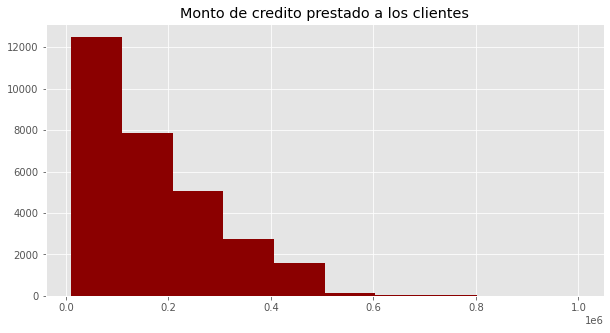

In [39]:
## Histograma
plt.figure(figsize=(10,5))
plt.hist(MontoCredito,facecolor="darkred")
plt.title("Monto de credito prestado a los clientes")
plt.show()
MontoCredito=df.LIMIT_BAL


In [40]:
PromedioInicial=np.mean(MontoCredito)
print(PromedioInicial)

167484.32266666667


#**Verificar normalidad**

Gráfico Q-Q Los gráficos de cuantiles teóricos (Gráficos Q-Q). Estos gráficos comparan los cuantiles de la distribución observada con los cuantiles teóricos de una distribución normal con la misma media y desviación estándar que los datos. Cuanto más se aproximen los datos a una normal, más alineados están los puntos entorno a la recta.

In [41]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


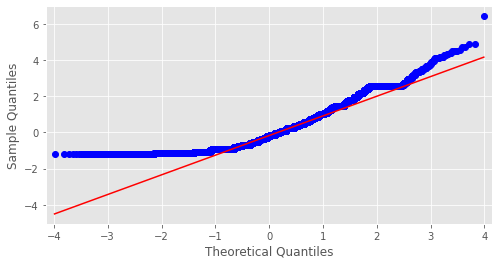

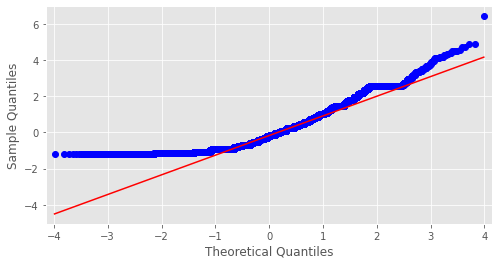

In [42]:
fig, ax=plt.subplots(figsize=(8,4))
sm.qqplot(MontoCredito,fit=True,line="q",ax=ax)

**Métodos Analíticos** Una prueba de hipótesis es una regla que especifica si se puede aceptar o rechazar una afirmación acerca de una población dependiendo de la evidencia proporcionada por una muestra de datos.

Un punto de decisión importante al trabajar con una muestra de datos es si utilizar métodos estadísticos paramétricos o no paramétricos. Los métodos estadísticos paramétricos asumen que los datos tienen una distribución conocida y específica, a menudo una distribución gaussiana. Si una muestra de datos no es gaussiana, entonces se violan los supuestos de las pruebas estadísticas paramétricas y deben usarse métodos estadísticos no paramétricos.

**Interpretación de una prueba**

H0: El monto del credito proviene de una distribucción Normal
Ha:El monto del credito No proviene de una distribucción Normal
p valor;

p <= alfa : rechazar H0, no es normal.
p> alpha : No rechazar H0, No significa que sea cierta normalidad, Significa que es muy probable que sea Normal
Prueba de Shapiro-Wilk Shapiro-Wilk evalúa una muestra de datos y cuantifica la probabilidad de que los datos se extraigan de una distribución gaussiana, llamada así por Samuel Shapiro y Martin Wilk.

En la práctica, se cree que la prueba de Shapiro-Wilk es una prueba confiable de normalidad, aunque se sugiere que la prueba puede ser adecuada para muestras de datos más pequeñas, por ejemplo, miles de observaciones o menos

**D'Agostino's K-squared test** La prueba de D'Agostino-Pearson verifica si la forma de la distribución es similar a la forma de la distribución normal. Esta es una combinación de la prueba de asimetría y la prueba de curtosis

In [43]:
stat,pvalue=stats.shapiro(MontoCredito)

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [44]:
pvalue

0.0



*   Segun shapiro, el monto de credito no es Normal



In [45]:
k2,pvalue2= stats.normaltest(MontoCredito)

In [46]:
pvalue2

0.0

Ninguno de los test muestra evidencias para Aceptar Normalidad
**Consecuencias de la falta de normalidad**

El hecho de no poder asumir la normalidad influye principalmente en los test de hipótesis paramétricos (t-test, anova,…) y en los modelos de regresión. Las principales consecuencias de la falta de normalidad son:

Los estimadores mínimo-cuadráticos no son eficientes (de mínima varianza).

Los intervalos de confianza de los parámetros del modelo y los contrastes de significancia son solamente aproximados y no exactos.

Los test estadísticos expuestos requieren que la población de la que procede la muestra tenga una distribución normal, no la muestra en sí. Si la muestra se distribuye de forma normal, se puede aceptar que así lo hace la población de origen. En el caso de que la muestra no se distribuya de forma normal pero se tenga certeza de que la población de origen sí lo hace, entonces, puede estar justificado aceptar los resultados obtenidos por los contrastes paramétricos como válidos.

**Teorema del Limite Central**

El teorema del límite central es un teorema fundamental de probabilidad y estadística. El teorema describe la distribución de la media de una muestra aleatoria proveniente de una población con varianza finita. Cuando el tamaño de la muestra es lo suficientemente grande, la distribución de las medias sigue aproximadamente una distribución normal.

## **3.1.2 Normalidad puede estar afectada por Datos Atipicos**
* Detectar Datos Atípicos Univariado
Análisis Gráfico Univariado

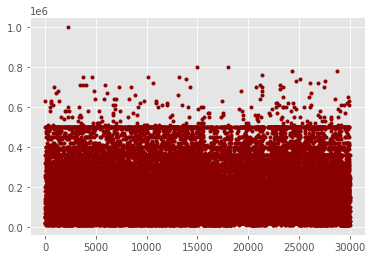

In [47]:
plt.plot(MontoCredito,".",color="darkred")
plt.show()

**Boxplot**

In [48]:
MontoCredito.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

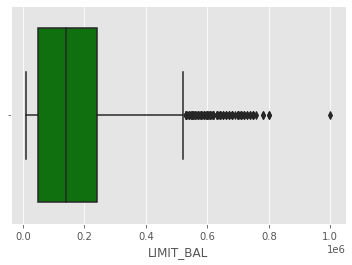

In [49]:
sns.boxplot(x=MontoCredito,color="green")

In [50]:
## Limites
## Limite Inferior
q1,q3=np.percentile(MontoCredito,[25,75])

In [51]:
q1

50000.0

In [52]:
q3

240000.0

In [53]:
RIC=q3-q1

In [54]:
RIC

190000.0

In [55]:
#Limite Superior
Limite_Superior=q3+1.5*(RIC)

In [56]:
Limite_Superior

525000.0

In [57]:
#Limite Inferior
Limite_Inferior=q1-1.5*(RIC)

In [58]:
Limite_Inferior

-235000.0

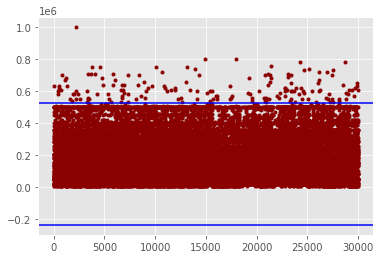

In [59]:
plt.plot(MontoCredito,".",color="darkred")
plt.axhline(y=Limite_Superior,color="blue")
plt.axhline(y=Limite_Inferior,color="blue")
plt.show()

**Filtrar Datos Atipicos**

In [60]:
df_Monto_Atipicos= df[(df.LIMIT_BAL >= Limite_Superior) | (df.LIMIT_BAL<= Limite_Inferior)]

In [61]:
df_Monto_Atipicos.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Mora
12,13,630000.0,2,2.0,2.0,41,-1,0,-1,-1,...,6500.0,6500.0,2870.0,1000.0,6500.0,6500.0,6500.0,2870.0,0.0,0
433,434,580000.0,2,1.0,1.0,36,0,0,0,0,...,169365.0,168755.0,167964.0,6422.0,6565.0,5951.0,6006.0,5894.0,5946.0,0
451,452,600000.0,1,1.0,1.0,53,2,2,0,0,...,447130.0,440982.0,434715.0,0.0,18000.0,16000.0,16000.0,21000.0,20000.0,1
527,528,620000.0,2,2.0,1.0,45,2,2,0,0,...,163781.0,167159.0,170894.0,0.0,6200.0,6000.0,6000.0,6500.0,6000.0,1
555,556,630000.0,2,2.0,1.0,47,0,0,0,-1,...,2632.0,8654.0,0.0,38187.0,1207.0,2632.0,8654.0,0.0,4981.0,0


In [62]:
df_Monto_Atipicos.shape

(167, 25)

In [63]:
(len(df_Monto_Atipicos)/len(df))*100

0.5566666666666666

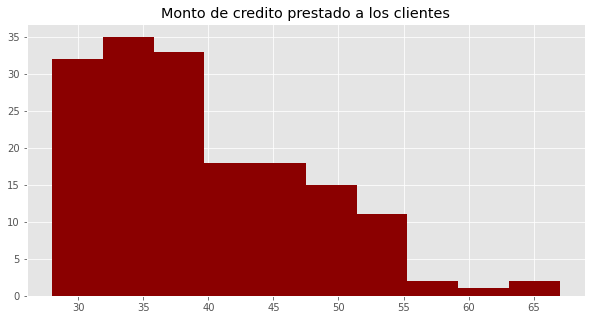

In [64]:
plt.figure(figsize=(10,5))
plt.hist(df_Monto_Atipicos.AGE,facecolor="darkred")
plt.title("Monto de credito prestado a los clientes")
plt.show()

**Histograma por Sexo**

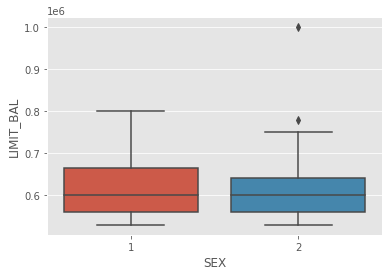

In [65]:
sns.boxplot(x="SEX",y="LIMIT_BAL",data=df_Monto_Atipicos)

**Promedio sin Datos Atipicos**

In [66]:
df_Sin_Monto_Atipicos= df[(df.LIMIT_BAL < Limite_Superior) & (df.LIMIT_BAL > Limite_Inferior)]
df_Sin_Monto_Atipicos.shape

(29833, 25)

In [67]:
print(PromedioInicial)

167484.32266666667


In [68]:
PromedioSinAtipico=np.mean(df_Sin_Monto_Atipicos.LIMIT_BAL)
print(PromedioSinAtipico)

164963.2849529045


**Probar Normalidad**

In [69]:
stat,pvalue=stats.shapiro(df_Sin_Monto_Atipicos.LIMIT_BAL)
pvalue

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.0

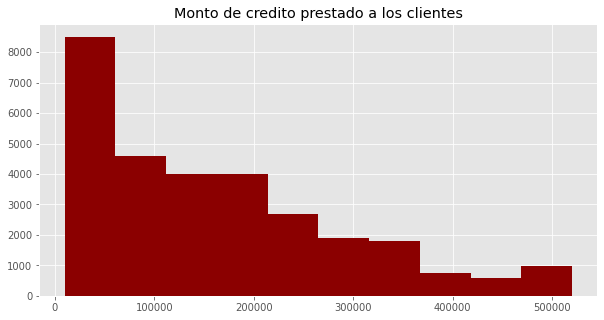

In [70]:
plt.figure(figsize=(10,5))
plt.hist(df_Sin_Monto_Atipicos.LIMIT_BAL,facecolor="darkred")
plt.title("Monto de credito prestado a los clientes")
plt.show()

**Exportar Excel**

In [71]:
df_Monto_Atipicos.to_excel("/content/drive/MyDrive/Diplomado_2022_01/ModelosSupervisado/Clasificacion/ClientesAtipicos.xlsx",
                           index=False)

FileNotFoundError: ignored

No parametrico
Simulacion Computacional
3.1.3 Enfoque no Paramétrico para calcular un paramétro Poblacional: Simulación computacional
Bootstrapping El bootstrapping (o bootstrap) es un método de remuestreo propuesto por Bradley Efron en 1979. Se utiliza para aproximar la distribución en el muestreo de un estadístico. Se usa frecuentemente para aproximar el sesgo o la varianza de un análisis estadístico, así como para construir intervalos de confianza o realizar contrastes de hipótesis sobre parámetros de interés. En la mayor parte de los casos no pueden obtenerse expresiones cerradas para las aproximaciones bootstrap y por lo tanto es necesario obtener remuestras en un ordenador para poner a prueba el método. La enorme potencia de cálculo de los ordenadores actuales facilita considerablemente la aplicabilidad de este método tan costoso computacionalmente

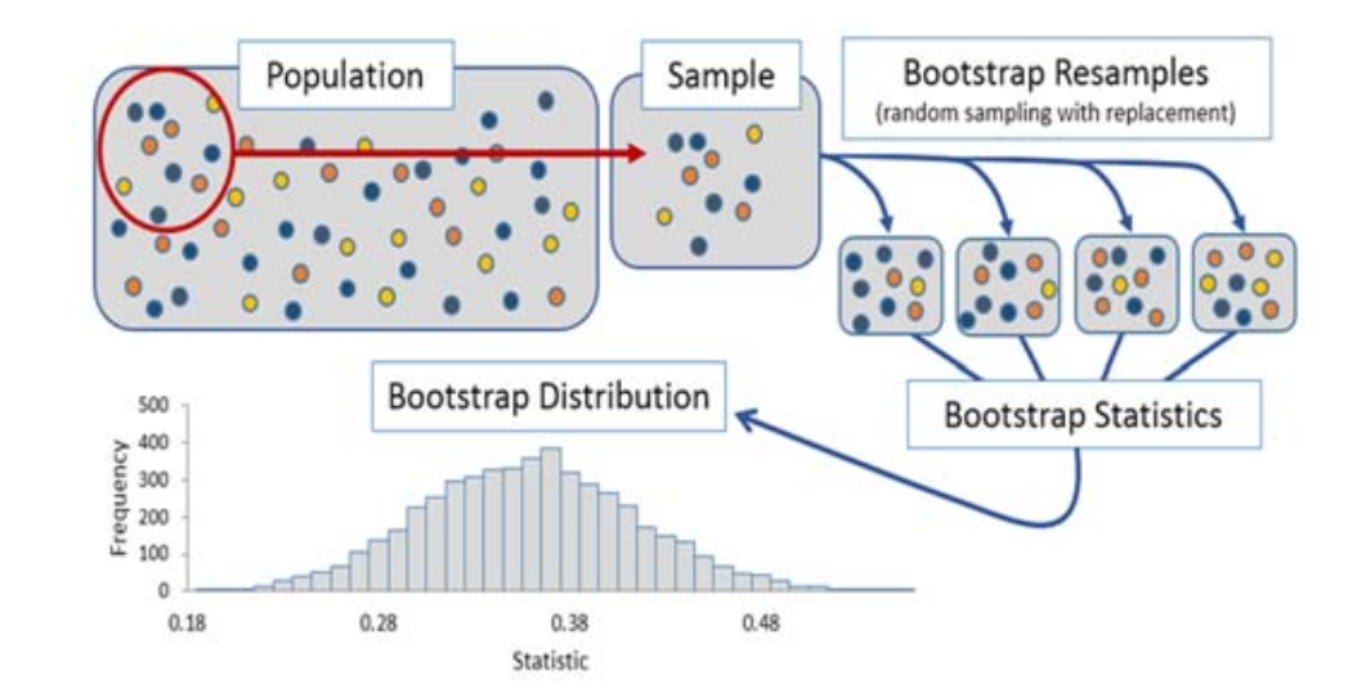image.png

In [72]:
from scipy.stats import trim_mean
from matplotlib import style

# estilo de graficas
style.use('ggplot') or plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

In [73]:
df.shape

(30000, 25)

In [74]:
print(PromedioInicial)
print(PromedioSinAtipico)

167484.32266666667
164963.2849529045


In [75]:
## FUncion para calcular Media
def calcular_media(x):
  estadistico=np.mean(x)
  return estadistico

In [76]:
def calcular_mediana():
  estadistico=np.median(x)
  return estadistico

In [77]:
def boostraping(x,fun_estasdistico,n_iteraciones=10000,Mu=1000):
    n=Mu
    dist_boot=np.full(shape=n_iteraciones,fill_value=np.nan) # se crea el vector
    
    for i in tqdm(range(n_iteraciones)):
        resample=np.random.choice(x,size=n,replace=True)
        dist_boot[i]=fun_estasdistico(resample)
        
    return dist_boot

**Ejecucion del Boostraping**

In [78]:
Promedio_Boostraping=boostraping(x=df_Sin_Monto_Atipicos.LIMIT_BAL,
                                 fun_estasdistico=calcular_media,
                                 n_iteraciones=200000,
                                 Mu=5000)

100%|██████████| 200000/200000 [00:20<00:00, 9679.05it/s]


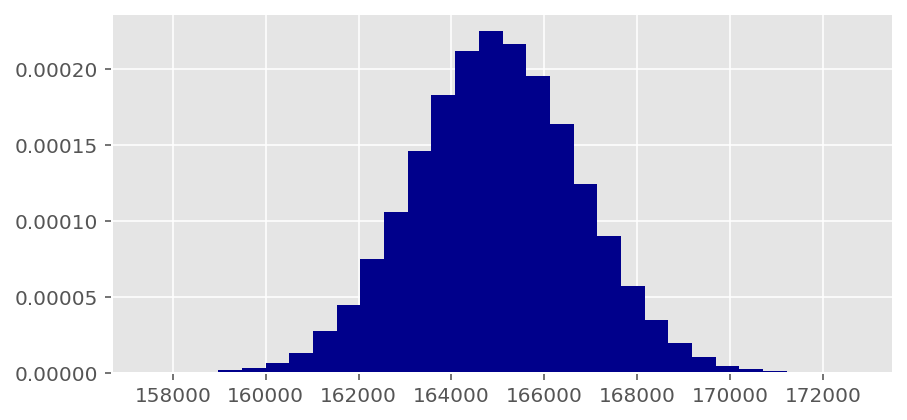

In [79]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7,3.3))
ax.hist(Promedio_Boostraping,bins=30, density=True,color="darkblue")
plt.show()

In [80]:
Promedio_Boostraping=np.mean(Promedio_Boostraping)

In [81]:
print(Promedio_Boostraping) # Infrencia Remuestro Bossetraping # Yo le creo a este

164969.81258008


In [82]:
Limite_Superior

525000.0

* Por TLC su cumple

In [83]:
y=df.LIMIT_BAL
#Evitar Notacion Cientifica
pd.options.display.float_format= '{:.2f}'.format
import math 
y=y.to_numpy() ## Arreglo
datos=y
# Regla de Sturges
K=1+3.322*math.log10(len(datos))
periodos=math.ceil(K) ## Aproximacion
inf= datos.min() ## LImite inferior para el primer intervalo
dif=datos.max()
sup= datos.max()+1
Intervalos= pd.interval_range(
    start=inf,
    end=sup,
    periods=periodos,
    name="Intervalo",
    closed="left"
)

td= pd.DataFrame(index=Intervalos)
td["FrecuenciaAbsoluta"]=pd.cut(datos,bins=td.index).value_counts()
td["FrecuenciaRelativa"]=pd.cut(datos,bins=td.index).value_counts()/len(df)*100

In [84]:
td

,FrecuenciaAbsoluta,FrecuenciaRelativa
Intervalo,,
"[10000.0, 71875.0625)",9232,30.77
"[71875.0625, 133750.125)",5309,17.70
"[133750.125, 195625.1875)",4309,14.36
"[195625.1875, 257500.25)",4433,14.78
"[257500.25, 319375.3125)",2426,8.09
"[319375.3125, 381250.375)",2042,6.81
"[381250.375, 443125.4375)",857,2.86
"[443125.4375, 505000.5)",1186,3.95
"[505000.5, 566875.5625)",86,0.29


In [85]:
td.FrecuenciaRelativa[0:5].sum()

85.69666666666667

In [86]:
td.FrecuenciaAbsoluta[0:5].sum()

25709

#**3.2)Análisis Bivariado**
Puede ayudar a determinar en qué medida es posible relacionar el valor de una variable en el caso en que conozcamos el valor de otra variable

In [87]:
df.LIMIT_BAL.var()

16834455682.155386

In [88]:
df.LIMIT_BAL.std()

129747.66156719506

In [89]:
cv = lambda x: np. std (x, ddof = 1 ) / np. mean (x) * 100

In [91]:
cv(df.LIMIT_BAL)

77.46854123500474

#**3.2.1 Numérica vs Numérica**
##**Correlación de Pearson**

La correlación de Pearson mide la dependencia lineal entre dos variables X e Y.

El coeficiente resultante es un valor entre -1 y 1 inclusive, donde:

1: correlación lineal positiva total.
0: Sin correlación lineal, las dos variables probablemente no se afectan entre sí.
-1: correlación lineal negativa total

**Scatterplot**

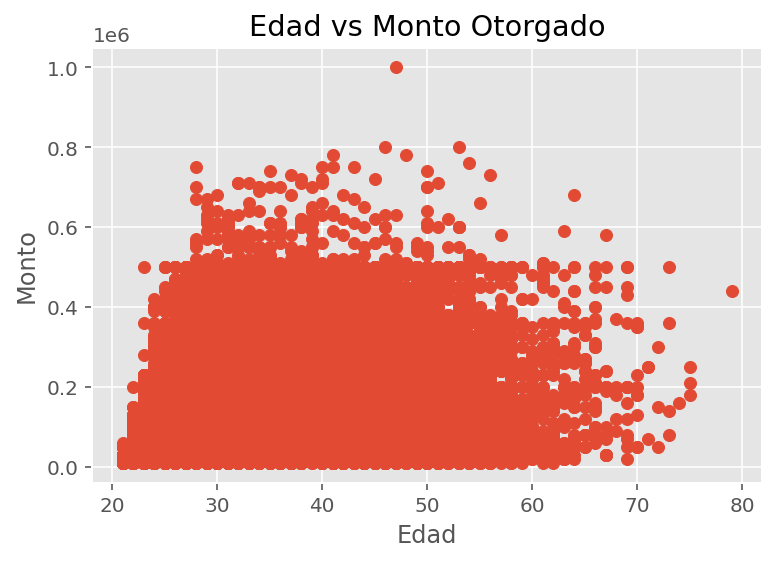

In [92]:
plt.scatter(df.AGE,df.LIMIT_BAL)
plt.title("Edad vs Monto Otorgado")
plt.xlabel("Edad")
plt.ylabel("Monto")
plt.show()

In [93]:
from scipy.stats import pearsonr

In [94]:
pearsonr(df.AGE,df.LIMIT_BAL)[0]

0.14471279755733596

* No hay relacion Lineal entre las dos Variables

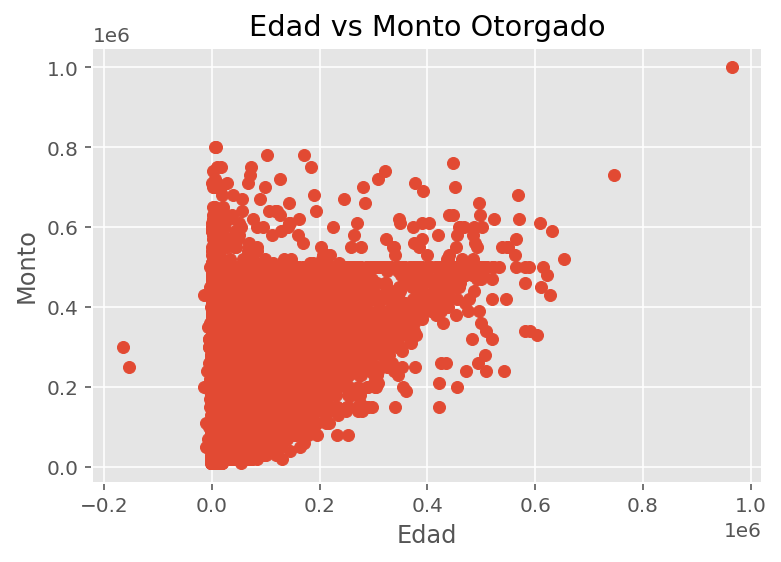

In [96]:
plt.scatter(df.BILL_AMT1,df.LIMIT_BAL)
plt.title("Edad vs Monto Otorgado")
plt.xlabel("Edad")
plt.ylabel("Monto")
plt.show()

In [97]:
pearsonr(df.BILL_AMT1,df.LIMIT_BAL)[0]

0.2854298649649899

**Matrox de correlación**

In [99]:
Matrix_Correlacion=df.corr()
Matrix_Correlacion

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
LIMIT_BAL,1.00,0.14,0.29,0.28,0.28,0.29,0.30,0.29,0.20,0.18,0.21,0.20,0.22,0.22
AGE,0.14,1.00,0.06,0.05,0.05,0.05,0.05,0.05,0.03,0.02,0.03,0.02,0.02,0.02
BILL_AMT1,0.29,0.06,1.00,0.95,0.89,0.86,0.83,0.80,0.14,0.10,0.16,0.16,0.17,0.18
BILL_AMT2,0.28,0.05,0.95,1.00,0.93,0.89,0.86,0.83,0.28,0.10,0.15,0.15,0.16,0.17
BILL_AMT3,0.28,0.05,0.89,0.93,1.00,0.92,0.88,0.85,0.24,0.32,0.13,0.14,0.18,0.18
BILL_AMT4,0.29,0.05,0.86,0.89,0.92,1.00,0.94,0.90,0.23,0.21,0.30,0.13,0.16,0.18
BILL_AMT5,0.30,0.05,0.83,0.86,0.88,0.94,1.00,0.95,0.22,0.18,0.25,0.29,0.14,0.16
BILL_AMT6,0.29,0.05,0.80,0.83,0.85,0.90,0.95,1.00,0.20,0.17,0.23,0.25,0.31,0.12
PAY_AMT1,0.20,0.03,0.14,0.28,0.24,0.23,0.22,0.20,1.00,0.29,0.25,0.20,0.15,0.19
PAY_AMT2,0.18,0.02,0.10,0.10,0.32,0.21,0.18,0.17,0.29,1.00,0.24,0.18,0.18,0.16


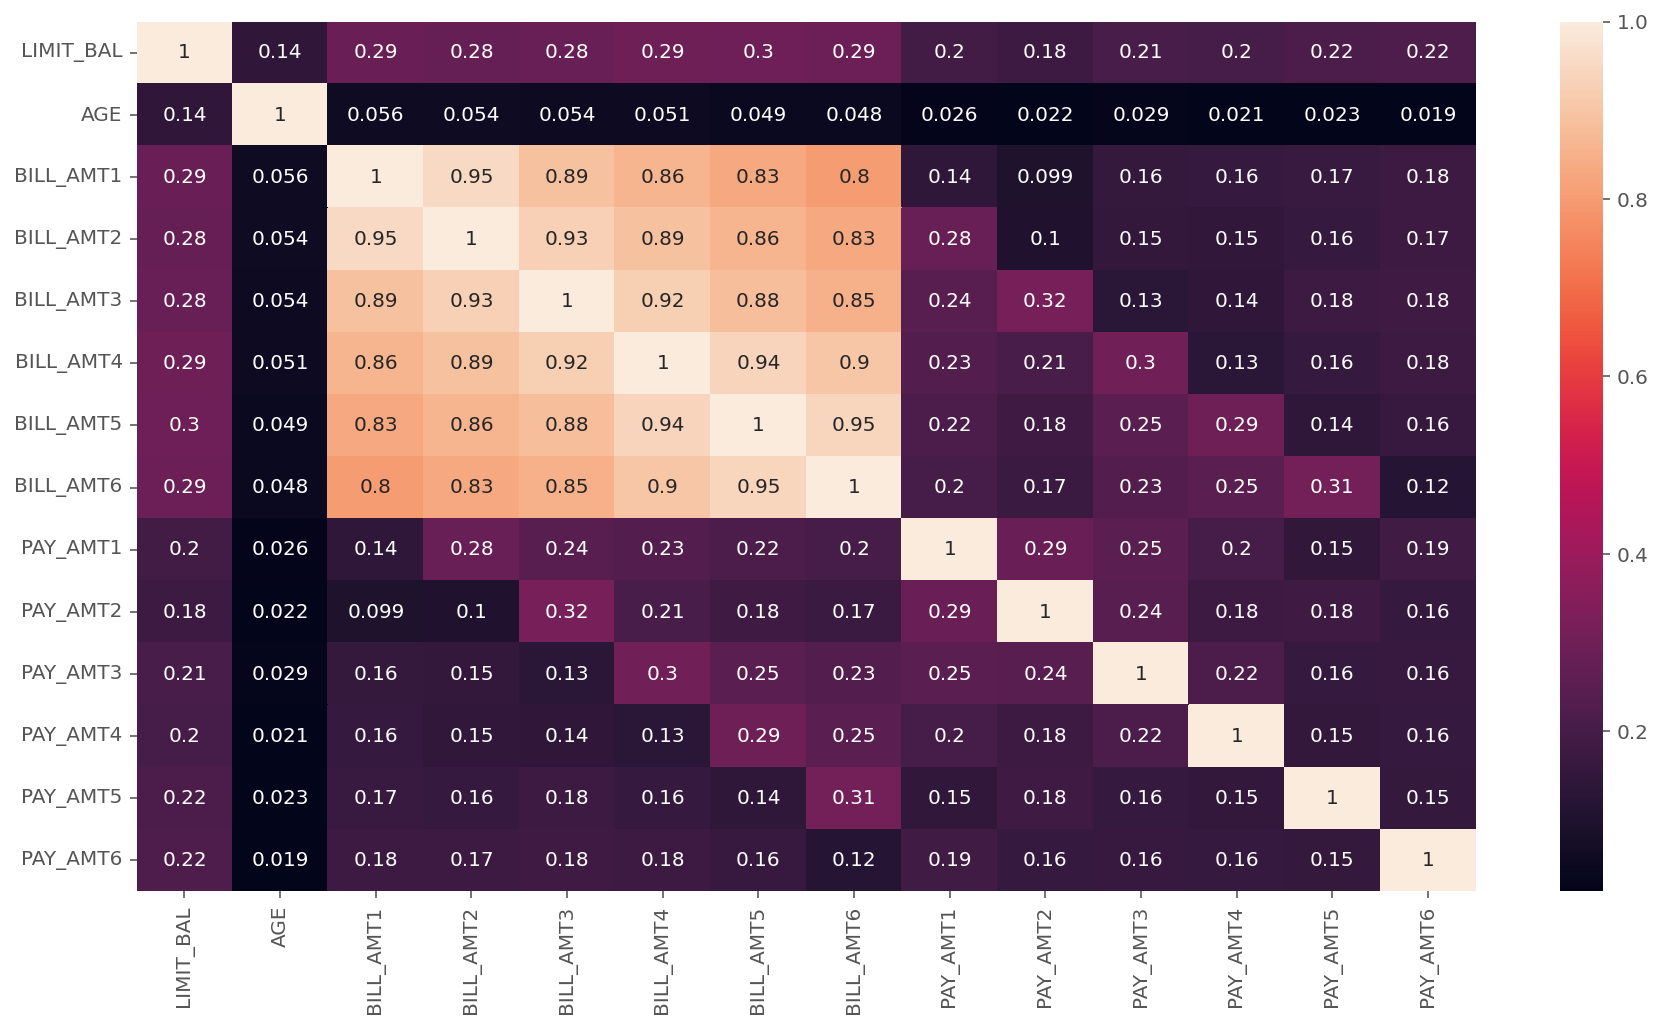

In [100]:
## Garica que nos ayude
fig, ax= plt.subplots(figsize=(15,8))
sns.heatmap(Matrix_Correlacion, annot=True)
plt.show()

#**3.2.2 Categórica vs Numérica**
ANOVA El Análisis de varianza (ANOVA) es un método estadístico utilizado para evaluar si existen diferencias significativas entre las medias de dos o más grupos. ANOVA devuelve dos parámetro

##**3.2.2.1 Test de Diferencia de Medias**

In [101]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Mora'],
      dtype='object')

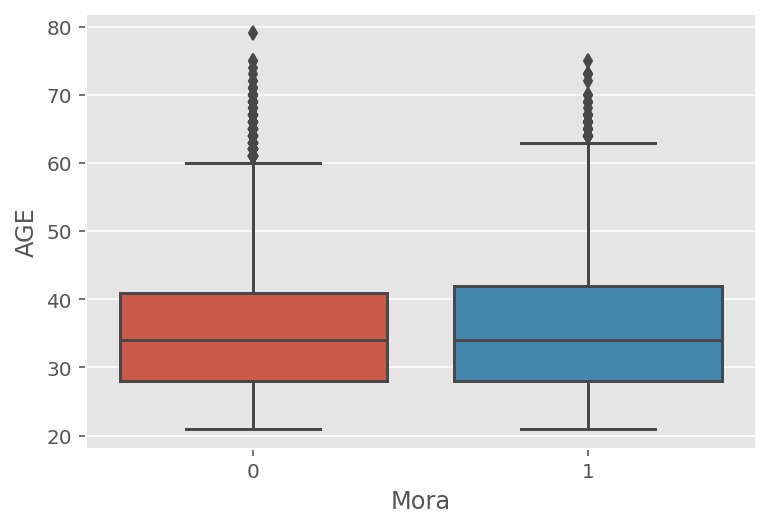

In [102]:
sns.boxplot(x="Mora",y="AGE",data=df)

**Normalidad**

In [112]:
datos=df[["AGE","Mora"]]
datos.groupby("Mora").size()

Mora
0    23364
1     6636
dtype: int64

In [113]:
## Test Normalidad
import pingouin as pg

ImportError: ignored

In [111]:
pg.normality(data=datos,dv="AGE",group="Mora")

NameError: ignored

Se encuentra evidencia significativa de que los datos no proceden de poblaciones con distribución normal. Sin embargo, dado que el tamaño de cada grupo es mayor que 30 se puede considerar que el t-test sigue siendo suficientemente robusto, aunque es necesario mencionarlo en las conclusiones. Una alternativa es recurrir a test no paramétrico basado en la mediana (Mann-Withney-Wilcoxon test) o un test de Bootstraping serían más adecuados. Otra opción es estudiar si los datos anómalos son excepciones que se pueden excluir del análisis.


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

In [110]:
!pip uninstall scipy -y
!pip uninstall pingouin -y
!pip install pingouin

Found existing installation: scipy 1.4.1
Uninstalling scipy-1.4.1:
  Successfully uninstalled scipy-1.4.1
     |████████████████████████████████| 183 kB 4.1 MB/s 
     |████████████████████████████████| 38.1 MB 1.1 MB/s 
     |████████████████████████████████| 9.8 MB 39.2 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.1-py3-none-any.whl size=194002 sha256=0e37d67695a4c5c99bc440748ca92267b4ca1ff13e0bb603e00cbd6857e5cedb
  Stored in directory: /root/.cache/pip/wheels/74/a7/b6/5b5f03b0395fdada1f45d3aed76e7da48873a02805545ef652
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=916d960f815eb4b9a3efef3dd7258702a2637f86c8082b1bdc2b2de75a72b4a7
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstall

**Igualdad de varianza (homocedasticidad)**

Existen varios test que permiten comparar varianzas. Dado que no se cumple el criterio de normalidad, uno de los recomendados es el test de Leven.

In [114]:
# Test de homocedasticidad
pg.homoscedasticity(data=datos,dv="AGE",group="Mora")

NameError: ignored

* las Varianzas son distintas, se tendría que realizar el t-test con la corrección de Welch.

**Test de Diferencia de Medias**

* Ho: media0=Media1: no hay diferencia entre las medias poblacionales
* Ha: media0 <> media1: si hay diferencia entre las medias poblacionales

In [115]:
datos.groupby("Mora").agg(["mean","std"])

AGE     
      mean  std
Mora           
0    35.42 9.08
1    35.73 9.69

In [116]:
Morosos= datos.loc[datos.Mora==1,"AGE"]
NoMorosos= datos.loc[datos.Mora==0,"AGE"]

In [118]:
pg.ttest(x=Morosos,y=NoMorosos,alternative="two-sided",correction=True)

NameError: ignored

* Pvalor 0.02
* añfa 0.05
* P valor Mayor que alfa (0.05) no se puede rechazar H0
##**3.2.2.2Test Anova con mas de 2 Factores**
El ANOVA de una vía, también conocido como ANOVA con un factor o modelo factorial de un solo factor, permite estudiar si existen diferencias significativas entre la media de una variable aleatoria continua en los diferentes niveles de otra variable cualitativa o factor, cuando los datos no están pareados. Es una extensión de los t-test independientes para más de dos grupos.

Las hipótesis contrastadas en un ANOVA de un factor son:

* H0 : No hay diferencias entre las medias de los diferentes grupos : μ1=μ2...=μk=μ
* H1 : Al menos un par de medias son significativamente distintas la una de la otra.

**Condiciones para ANOVA de una vía con datos independientes**

Independencia: las observaciones deben ser aleatorias e independientes las unas de las otras. Los grupos (niveles del factor) deben de ser independientes entre ellos.
Distribución normal de cada uno de los niveles o grupos: la variable estudiada debe de distribuirse de forma normal en cada uno de los grupos, siendo menos estricta esta condición cuanto mayor sea el tamaño de cada grupo.
Misma varianza entre grupos (homocedasticidad): la varianza dentro de los grupos debe de ser aproximadamente igual en todos ellos. Esto es así ya que en la hipótesis nula se considera que todas las observaciones proceden de la misma población, por lo que tienen la misma media y también la misma varianza.
Comparación múltiple de medias. Contrastes POST-HOC

Si un ANOVA resulta significativo implica que, al menos, dos de las medias comparadas son significativamente distintas entre sí, pero no se determina cuáles. Para identificarlas, hay que comparar dos a dos las medias de todos los grupos mediante un t-test u otro test que permita comparar 2 grupos

EDUCACIÓN : (1 = posgrado, 2 = universidad, 3 = bachillerato, 4 = otros, 5 = desconocido, 6 = desconocido)

In [119]:
df.EDUCATION.value_counts()

2.0    14030
1.0    10585
3.0     4917
5.0      331
4.0      123
Name: EDUCATION, dtype: int64

In [120]:
datos=df[["EDUCATION","LIMIT_BAL"]]

In [121]:
datos.groupby("EDUCATION").size()

EDUCATION
1.0    10585
2.0    14030
3.0     4917
4.0      123
5.0      331
dtype: int64

In [122]:
# Média y desviación típica por grupo
datos.groupby("EDUCATION").agg(["mean","std","median"])

LIMIT_BAL                    
               mean       std    median
EDUCATION                              
1.0       212956.07 135474.94 200000.00
2.0       147062.44 120672.28 110000.00
3.0       126550.27 113979.32  80000.00
4.0       220894.31 111531.87 200000.00
5.0       165093.66 118478.33 150000.00

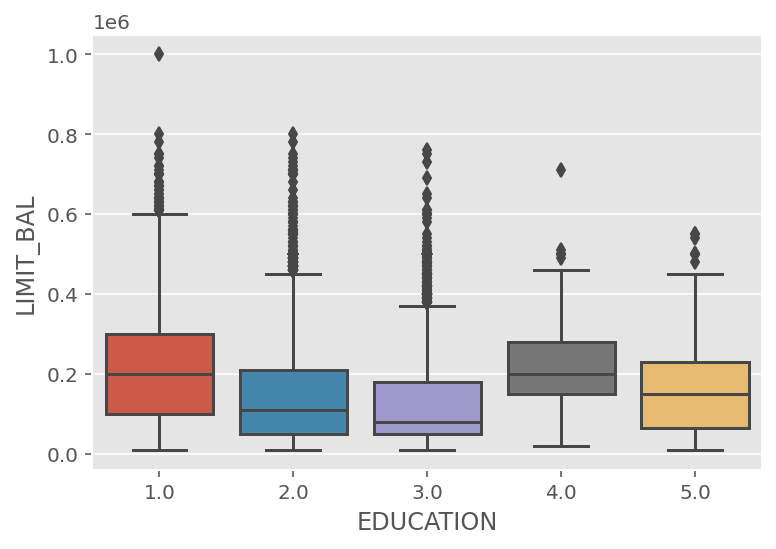

In [123]:
sns.boxplot(x="EDUCATION",y="LIMIT_BAL",data=df)

**Verificar condiciones para un ANOVA**

Independencia

Los grupos (variable categórica), dentro de cada grupo son independientes entre ellos ya que se han tomado desde el azar del negocio

Distribución normal de las observaciones

In [124]:
pg.normality(data=datos, dv="LIMIT_BAL",group="EDUCATION")

NameError: ignored